## Lab 4 - part 2: Data Weights and Autocorellation

**TU Delft and WUR**<br>
**Q1 2024**<br>
**Instructor:** Theodoros Chatzivasileiadis <br>
**Instructor:** Hans Hoogenboom <br>
**TA:** Ka Yi Chua <br>
**[Metropolitan Data 1](https://jhoogenboom.github.io/spatial-data-science/_index.html)** <br>



## Exercise 4a: Spatial Autocorrelation and ESDA 

USE the Liverpool IMD data we have been using in previous sessions. This will require you to:

* Load up the IMD dataset for Liverpool.
* Create a choropleth of the `imd_score` variable.
* Compute the spatial weights matrix for the LSOAs. Think of one criterium to build it that you think would fit this variable (e.g. contiguity, distance-based, etc.), and apply it.
* Create the standardized version of the IMD scores.
* Calculate the spatial lag of the standardized scores.
* Create the Moran Plot.
* Calculate the value of Moran's I as well as its significance level.
* Perform a LISA analysis and generate a map of the results. What are the main patterns?

In [1]:
# your code here
import seaborn as sns
import pandas as pd
import pysal as ps
from pysal.lib import weights
from libpysal.io import open as psopen
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
imd_shp = 'C:\\Users\Admin\\Desktop\\Code\\TEST\\brexit.gpkg'
lookup_path = 'C:\\Users\Admin\\Desktop\\Code\\TEST'

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    380 non-null    int32   
 1   LAD14CD     380 non-null    object  
 2   LAD14NM     380 non-null    object  
 3   LAD14NMW    22 non-null     object  
 4   id          380 non-null    int32   
 5   Region_Cod  380 non-null    object  
 6   Region      380 non-null    object  
 7   Area        380 non-null    object  
 8   Electorate  380 non-null    int32   
 9   ExpectedBa  380 non-null    int32   
 10  VerifiedBa  380 non-null    int32   
 11  Pct_Turnou  380 non-null    float64 
 12  Votes_Cast  380 non-null    int32   
 13  Valid_Vote  380 non-null    int32   
 14  Remain      380 non-null    int32   
 15  Leave       380 non-null    int32   
 16  Rejected_B  380 non-null    int32   
 17  No_officia  380 non-null    int32   
 18  Voting_for  380 non-null    int32   
 19  

<Axes: >

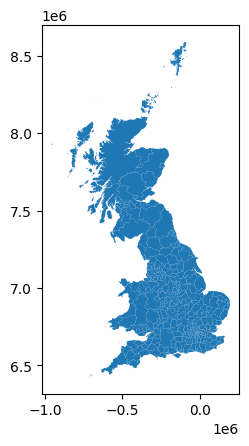

In [3]:
imd = gpd.read_file("C:\\Users\Admin\\Desktop\\Code\\TEST\\brexit.gpkg")

#imd_shp = imd_shp.set_index('BBKom_ID')
# Display summary
imd.info()
imd.plot()

In [4]:
w_queen = weights.Queen.from_dataframe(imd, ids="LAD14CD")
w_queen

C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\libpysal\weights\_contW_lists.py:23: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if shape.type.lower() == "polygon":
C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\libpysal\weights\_contW_lists.py:26: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  elif shape.type.lower() == "linestring":
C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\libpysal\weights\_contW_lists.py:28: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  elif shape.type.lower() == "multilinestring":
C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\libpysal\weights\_contW_lists.py:30: ShapelyDeprecationWarning: The 'type' attrib

In [5]:
w_queen['E06000045']

{'E07000091': 1.0, 'E07000093': 1.0, 'E07000086': 1.0}

In [6]:
w_queen['E06000045']['E07000091']

1.0

In [7]:
w_queen.neighbors['E06000045']

['E07000091', 'E07000093', 'E07000086']

In [8]:
w_queen.weights['E06000045']

[1.0, 1.0, 1.0]

In [9]:
w_queen.cardinalities['E06000045']

3

In [10]:
queen_card = pd.Series(w_queen.cardinalities)
queen_card.head()

E06000001    3
E06000002    3
E06000003    5
E06000004    6
E06000005    4
dtype: int64

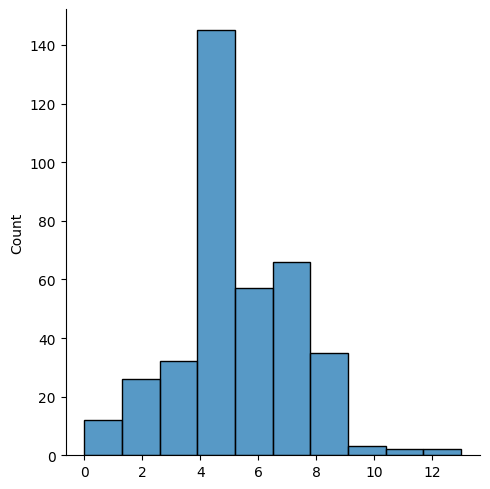

In [11]:
sns.displot(queen_card, bins=10)

In [12]:
# Number of observations
w_queen.n

380

In [13]:
# Average number of neighbors
w_queen.mean_neighbors

5.21578947368421

In [14]:
# Min number of neighbors
w_queen.min_neighbors

0

In [15]:
# Max number of neighbors
w_queen.max_neighbors

13

In [16]:
# Islands (observations disconnected)
w_queen.islands

['E06000046', 'E06000053', 'S12000013', 'S12000023', 'S12000027', 'W06000001']

In [17]:
# Order of IDs (first five only in this case)
w_queen.id_order[:5]

['E06000001', 'E06000002', 'E06000003', 'E06000004', 'E06000005']

In [18]:
imd = imd.set_index("LAD14CD")

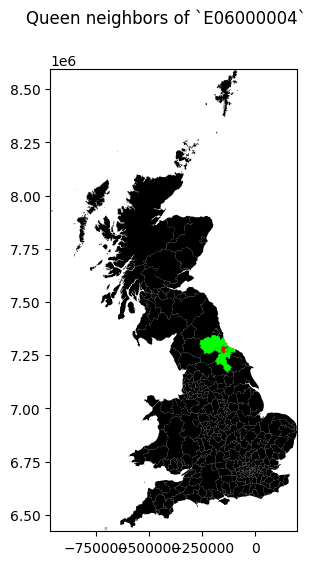

In [26]:
# Setup figure
f, ax = plt.subplots(1, figsize=(6, 6))
# Plot base layer of polygons
imd.plot(ax=ax, facecolor='k', linewidth=0.3)
# Select focal polygon
# NOTE we pass both the area code and the column name
#      (`geometry`) within brackets!!!
focus = imd.loc[['E06000004'], ['geometry']]
# Plot focal polygon
focus.plot(facecolor='red', alpha=1, linewidth=0, ax=ax)
# Plot neighbors
neis = imd.loc[list(w_queen['E06000004']), :]
neis.plot(ax=ax, facecolor='lime', linewidth=0)
# Title
f.suptitle("Queen neighbors of `E06000004`")
# Style and display on screen
ax.set_ylim(imd.total_bounds[1], imd.total_bounds[3])  # y范围
ax.set_xlim(imd.total_bounds[0], imd.total_bounds[2])  # x范围 
#ax.set_ylim(7.1, 7.4)  # y范围
#ax.set_xlim(-240000, 0)  # x范围
plt.show()

In [21]:
print(focus.geometry)
print(neis.geometry)

LAD14CD
E06000004    MULTIPOLYGON (((-146637.97 7293230.452, -14662...
Name: geometry, dtype: geometry
LAD14CD
E06000047    MULTIPOLYGON (((-193364.444 7346056.109, -1933...
E06000005    MULTIPOLYGON (((-182304.32 7287910.3, -182303....
E06000002    MULTIPOLYGON (((-139272.615 7282988.17, -13909...
E07000164    MULTIPOLYGON (((-136491.104 7267692.732, -1363...
E06000003    MULTIPOLYGON (((-126494.218 7293275.078, -1264...
E06000001    MULTIPOLYGON (((-141202.225 7308889.307, -1411...
Name: geometry, dtype: geometry


For this part I would like you to experiment with Data from Amstedam. However this will require you to find the dataset yourself!

## Question 1: Building a Contiguity-Based Weight Matrix

Use PySAL to create a contiguity-based weight matrix (W) for a given spatial dataset of polygons. Write a function create_contiguity_weights that:

    Reads in a shapefile of polygons.
    Constructs a Queen contiguity-based spatial weights matrix.
    Returns the weight matrix.

## Question 2: Calculating Moran’s I

Write a function calculate_morans_i that:

    Takes a spatial weight matrix W and an attribute array y.
    Calculates Moran’s I for the given attribute array.
    Returns the Moran’s I value and its p-value.

## Question 3: Standardizing Spatial Weight Matrices

Create a function standardize_weights that:

    Takes a spatial weight matrix W.
    Standardizes it so that the weights of each row sum to one.
    Returns the standardized weight matrix.

## Question 4: Creating Distance-Based Weights

Write a function create_distance_weights that:

    Takes a set of point coordinates and a threshold distance.
    Constructs a distance-based spatial weight matrix where all points within the threshold distance are assigned a weight.
    Returns the weight matrix.

## Question 5: Visualizing a Moran Plot

Using PySAL, write a function plot_moran that:

    Takes a spatial weights matrix W and an attribute array y.
    Creates and displays a Moran plot for the attribute.
    Saves the Moran plot as an image file.

In [6]:
# Question 5
# answered by Junbing Liao

import numpy as np
import matplotlib.pyplot as plt
from pysal.explore import esda
from splot.esda import moran_scatterplot

def plot_moran(W, y):

    # Calculate Moran's I
    mi = esda.Moran(y, W)
    
    # Create the Moran scatter plot
    f, ax = plt.subplots()
    moran_scatterplot(mi, ax=ax, p=0.05)
    
    # Add labels and title
    ax.set_title("Moran's I Scatter Plot")
    ax.set_xlabel("Spatially Lagged Values")
    ax.set_ylabel("Attribute Values")
    
    # Save the plot
    plt.savefig('C:\\Users\\Admin\\Desktop\\moran_plot.png', dpi=300)
    
    # Show the plot
    plt.show()

('WARNING: ', 45, ' is an island (no neighbors)')
('WARNING: ', 51, ' is an island (no neighbors)')
('WARNING: ', 331, ' is an island (no neighbors)')
('WARNING: ', 339, ' is an island (no neighbors)')
('WARNING: ', 342, ' is an island (no neighbors)')
('WARNING: ', 358, ' is an island (no neighbors)')


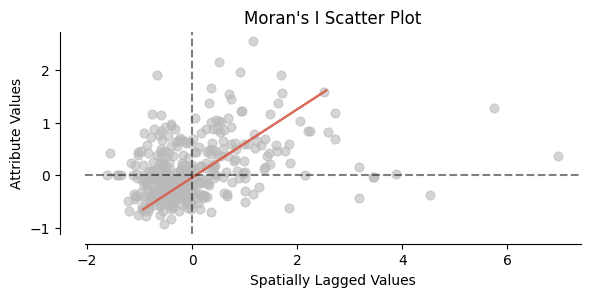

In [7]:
import seaborn as sns
import pandas as pd
import pysal as ps
from pysal.lib import weights
from libpysal.io import open as psopen
import geopandas as gpd

brxt_shp = gpd.read_file("C:\\Users\\Admin\\Desktop\\Code\\TEST\\brexit.gpkg") 
W = weights.Queen.from_dataframe(brxt_shp)
y = brxt_shp['Valid_Vote'].values 
plot_moran(W, y)